# World Happiness Report Project

Project Description
The World Happiness Report is a landmark survey of the state of global happiness.
The first report was published in 2012, the second in 2013, the third in 2015,
and the fourth in the 2016 Update. The World Happiness 2017, which ranks 
155 countries by their happiness levels, was released at the United Nations
at an event celebrating International Day of Happiness on March 20th. 
The report continues to gain global recognition as governments, organizations 
and civil society increasingly use happiness indicators to inform their 
policy-making decisions. Leading experts across fields – economics, psychology,
survey analysis, national statistics, health, public policy and more 
– describe how measurements of well-being can be used effectively to assess
the progress of nations. The reports review the state of happiness in the 
world today and show how the new science of happiness explains personal 
and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. 
The purpose in establishing Dystopia is to have a benchmark against 
which all countries can be favorably compared (no country performs 
morepoorly than Dystopia) in terms of each of the six key variables,
thus allowing each sub-bar to be of positive width. 
The lowest scores observed for the six key variables, therefore,
characterize Dystopia. Since life would be very unpleasant in a country
with the world’s lowest incomes, lowest life expectancy, lowest generosity, 
most corruption, least freedom and least social support, it is referred to 
as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, 
reflecting the extent to which the six variables either over- or 
under-explain average life evaluations. These residuals have an average 
value of approximately zero over the whole set of countries. 


What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('World_happiness_predictions.csv')
data.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.tail(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

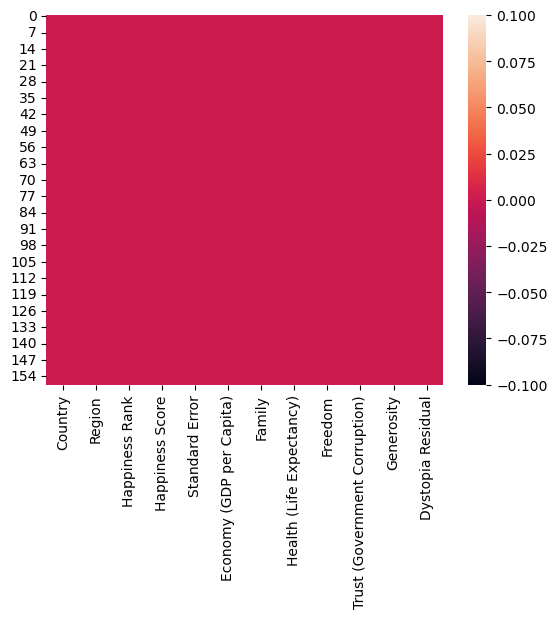

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

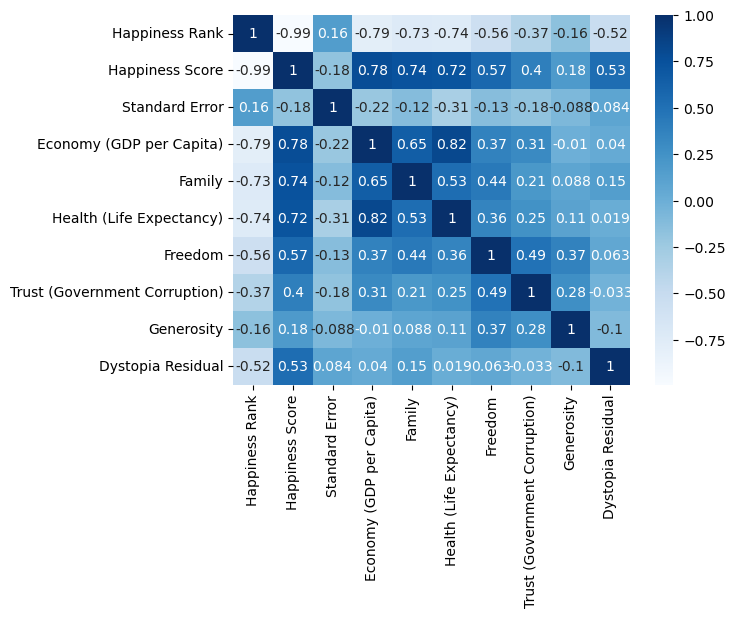

In [10]:
sns.heatmap(data.corr(), cmap='Blues', annot=True)

Top 10 contries happiest country based On Happiness score 

In [11]:
Top10 = data.sort_values(by='Happiness Score', ascending= False).head(10)
Top10

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Bottom 10 Country based on rank 

In [12]:
Bottom10 = data.sort_values(by='Happiness Score',ascending=True).head(10)
Bottom10

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [13]:
# EDA 

# Determination of data skewness and hadling skewness 

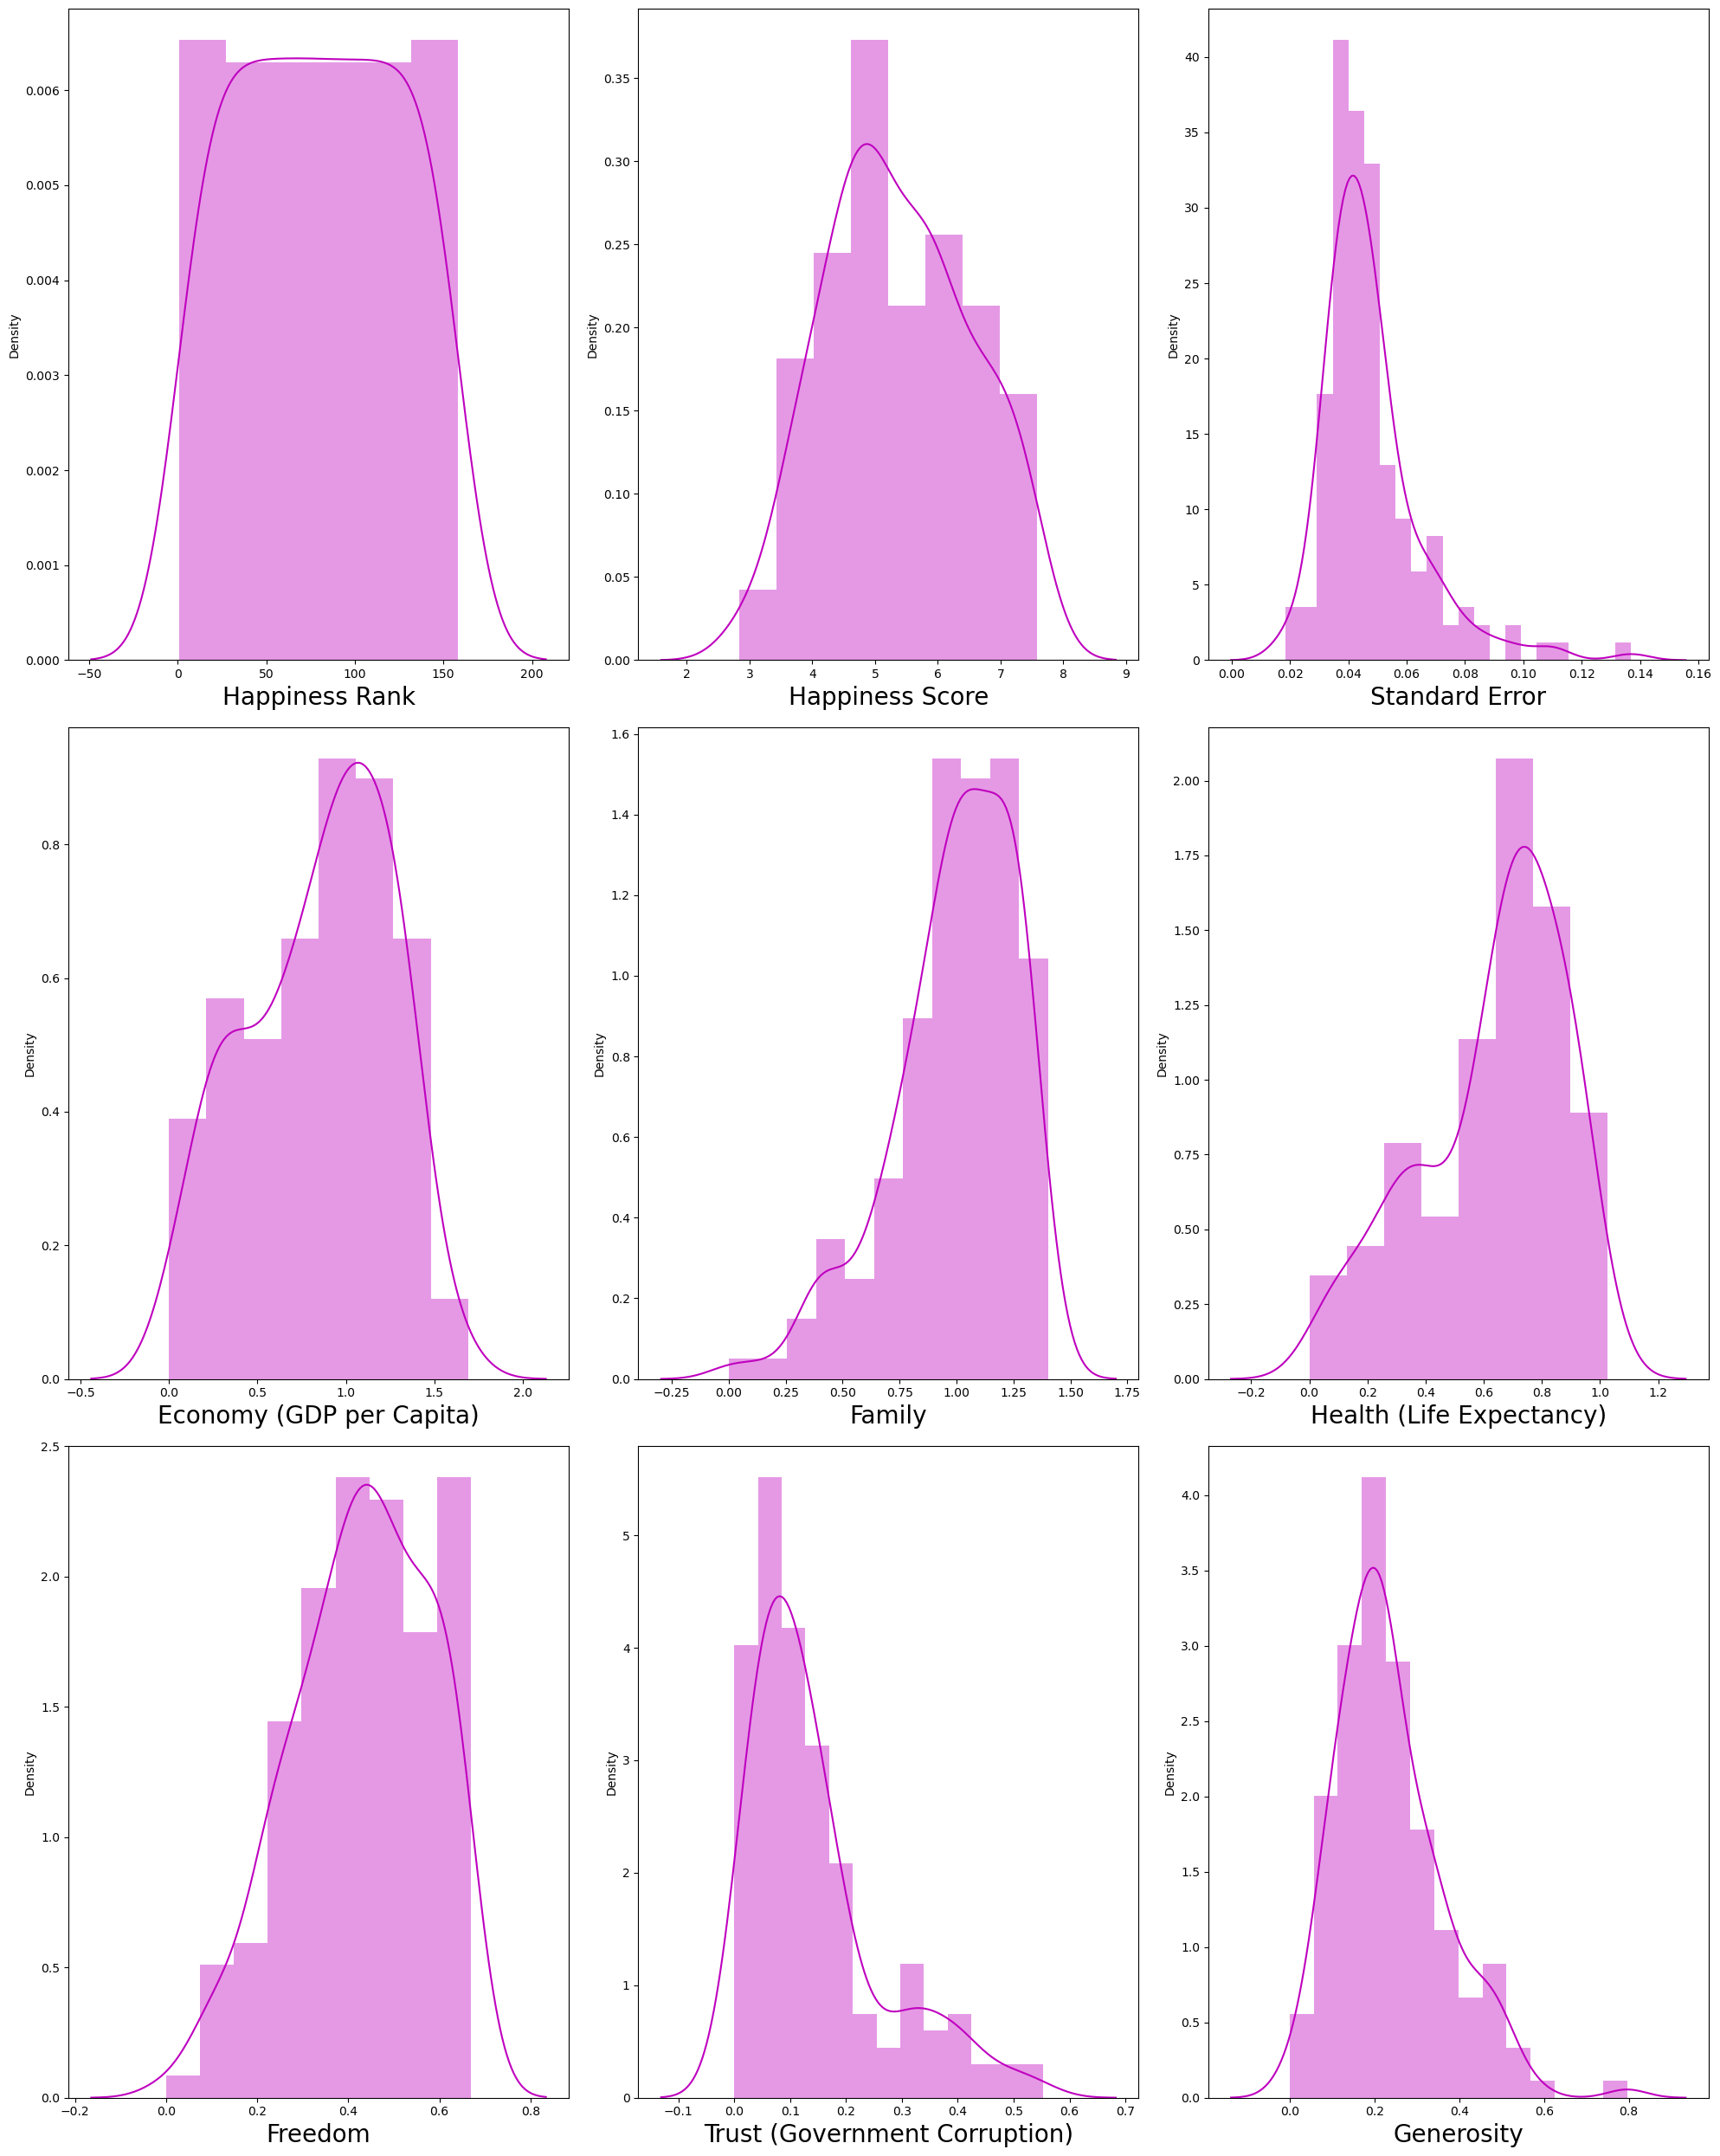

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data.columns:
    if plotnumber<=9:
        if data[column].dtype in['int64','float64']:
            plt.subplot(3,3,plotnumber)
            sns.distplot(data[column],color='m')
            plt.xlabel(column,fontsize=20)
            plotnumber +=1
            
plt.tight_layout()
plt.show()

In [15]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [16]:
from scipy.stats import boxcox
data['Standard Error']=boxcox(data['Standard Error'],0)

In [17]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [18]:
new = data[data.columns[3:]]
new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Input and output variable selection 

In [19]:
X=new.drop(columns =['Happiness Score'])
Y=new['Happiness Score']

Multicollinearity using Variance_inflation_factor


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

In [21]:
vif

,vif,Features
0,27.556233,Standard Error
1,22.304414,Economy (GDP per Capita)
2,26.891252,Family
3,24.911354,Health (Life Expectancy)
4,15.965214,Freedom
5,3.471763,Trust (Government Corruption)
6,5.810159,Generosity
7,14.295404,Dystopia Residual


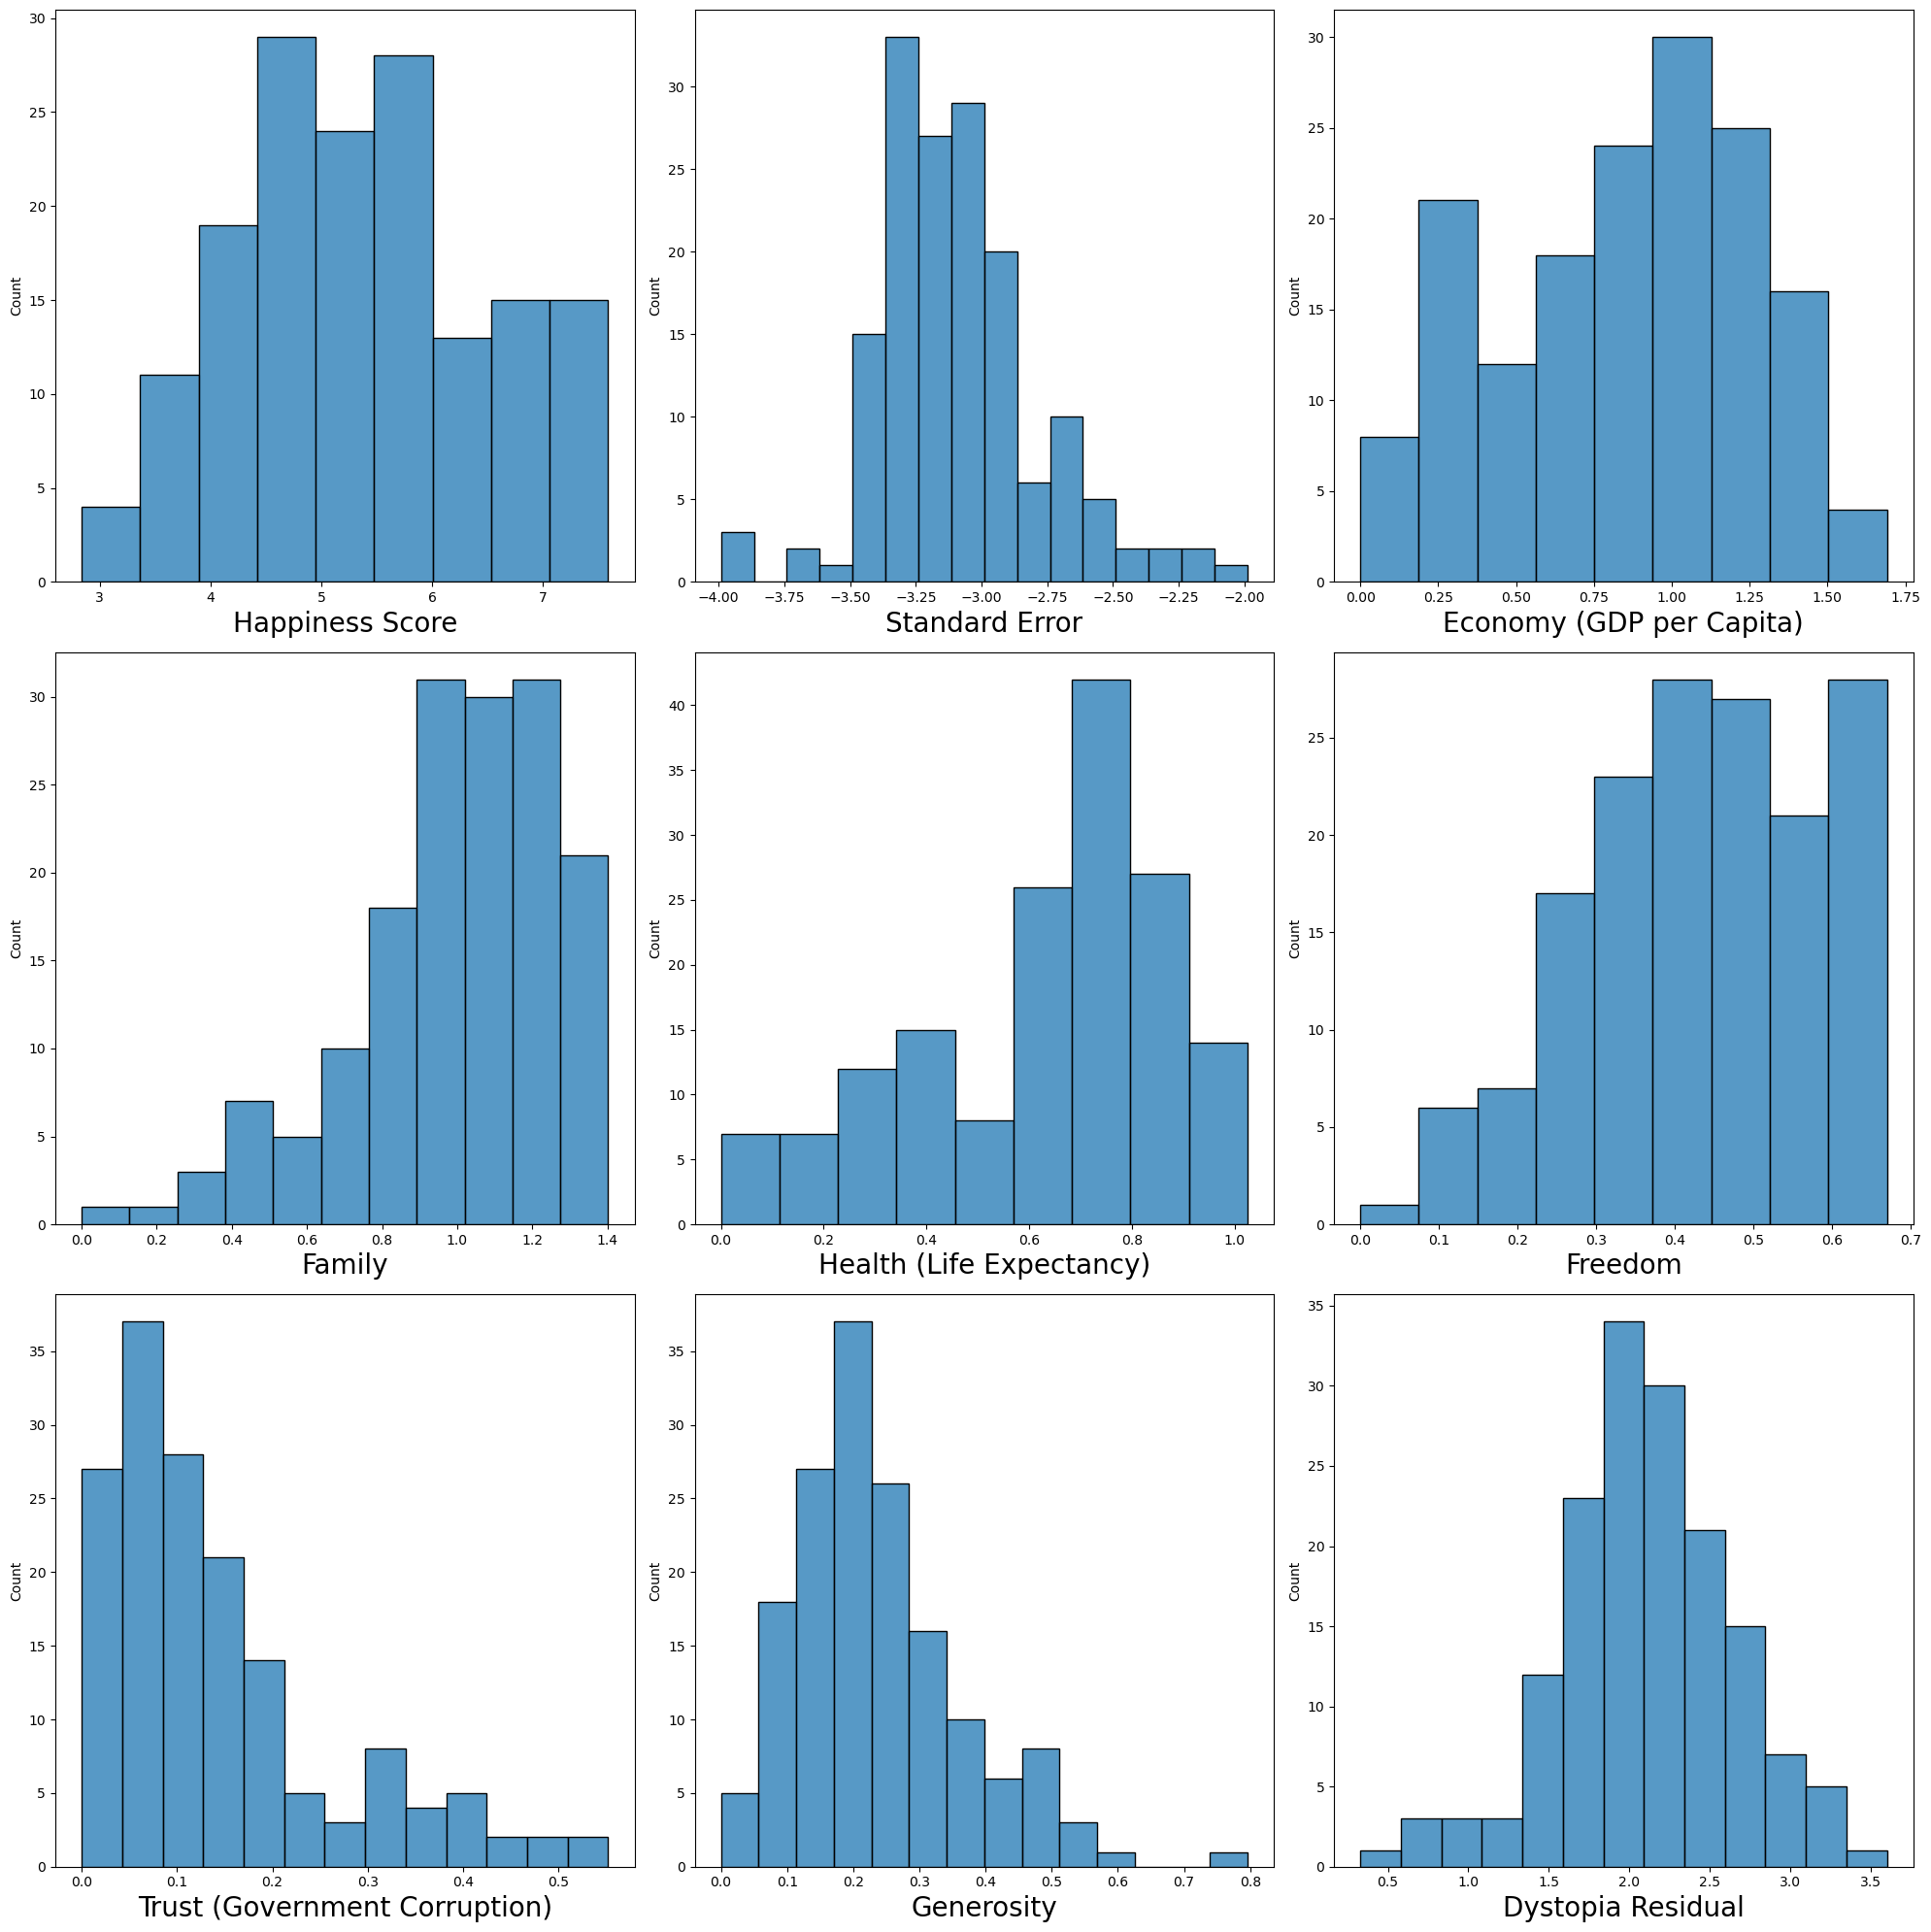

In [22]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1
for column in new:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(new[column],palette='Rainbow')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

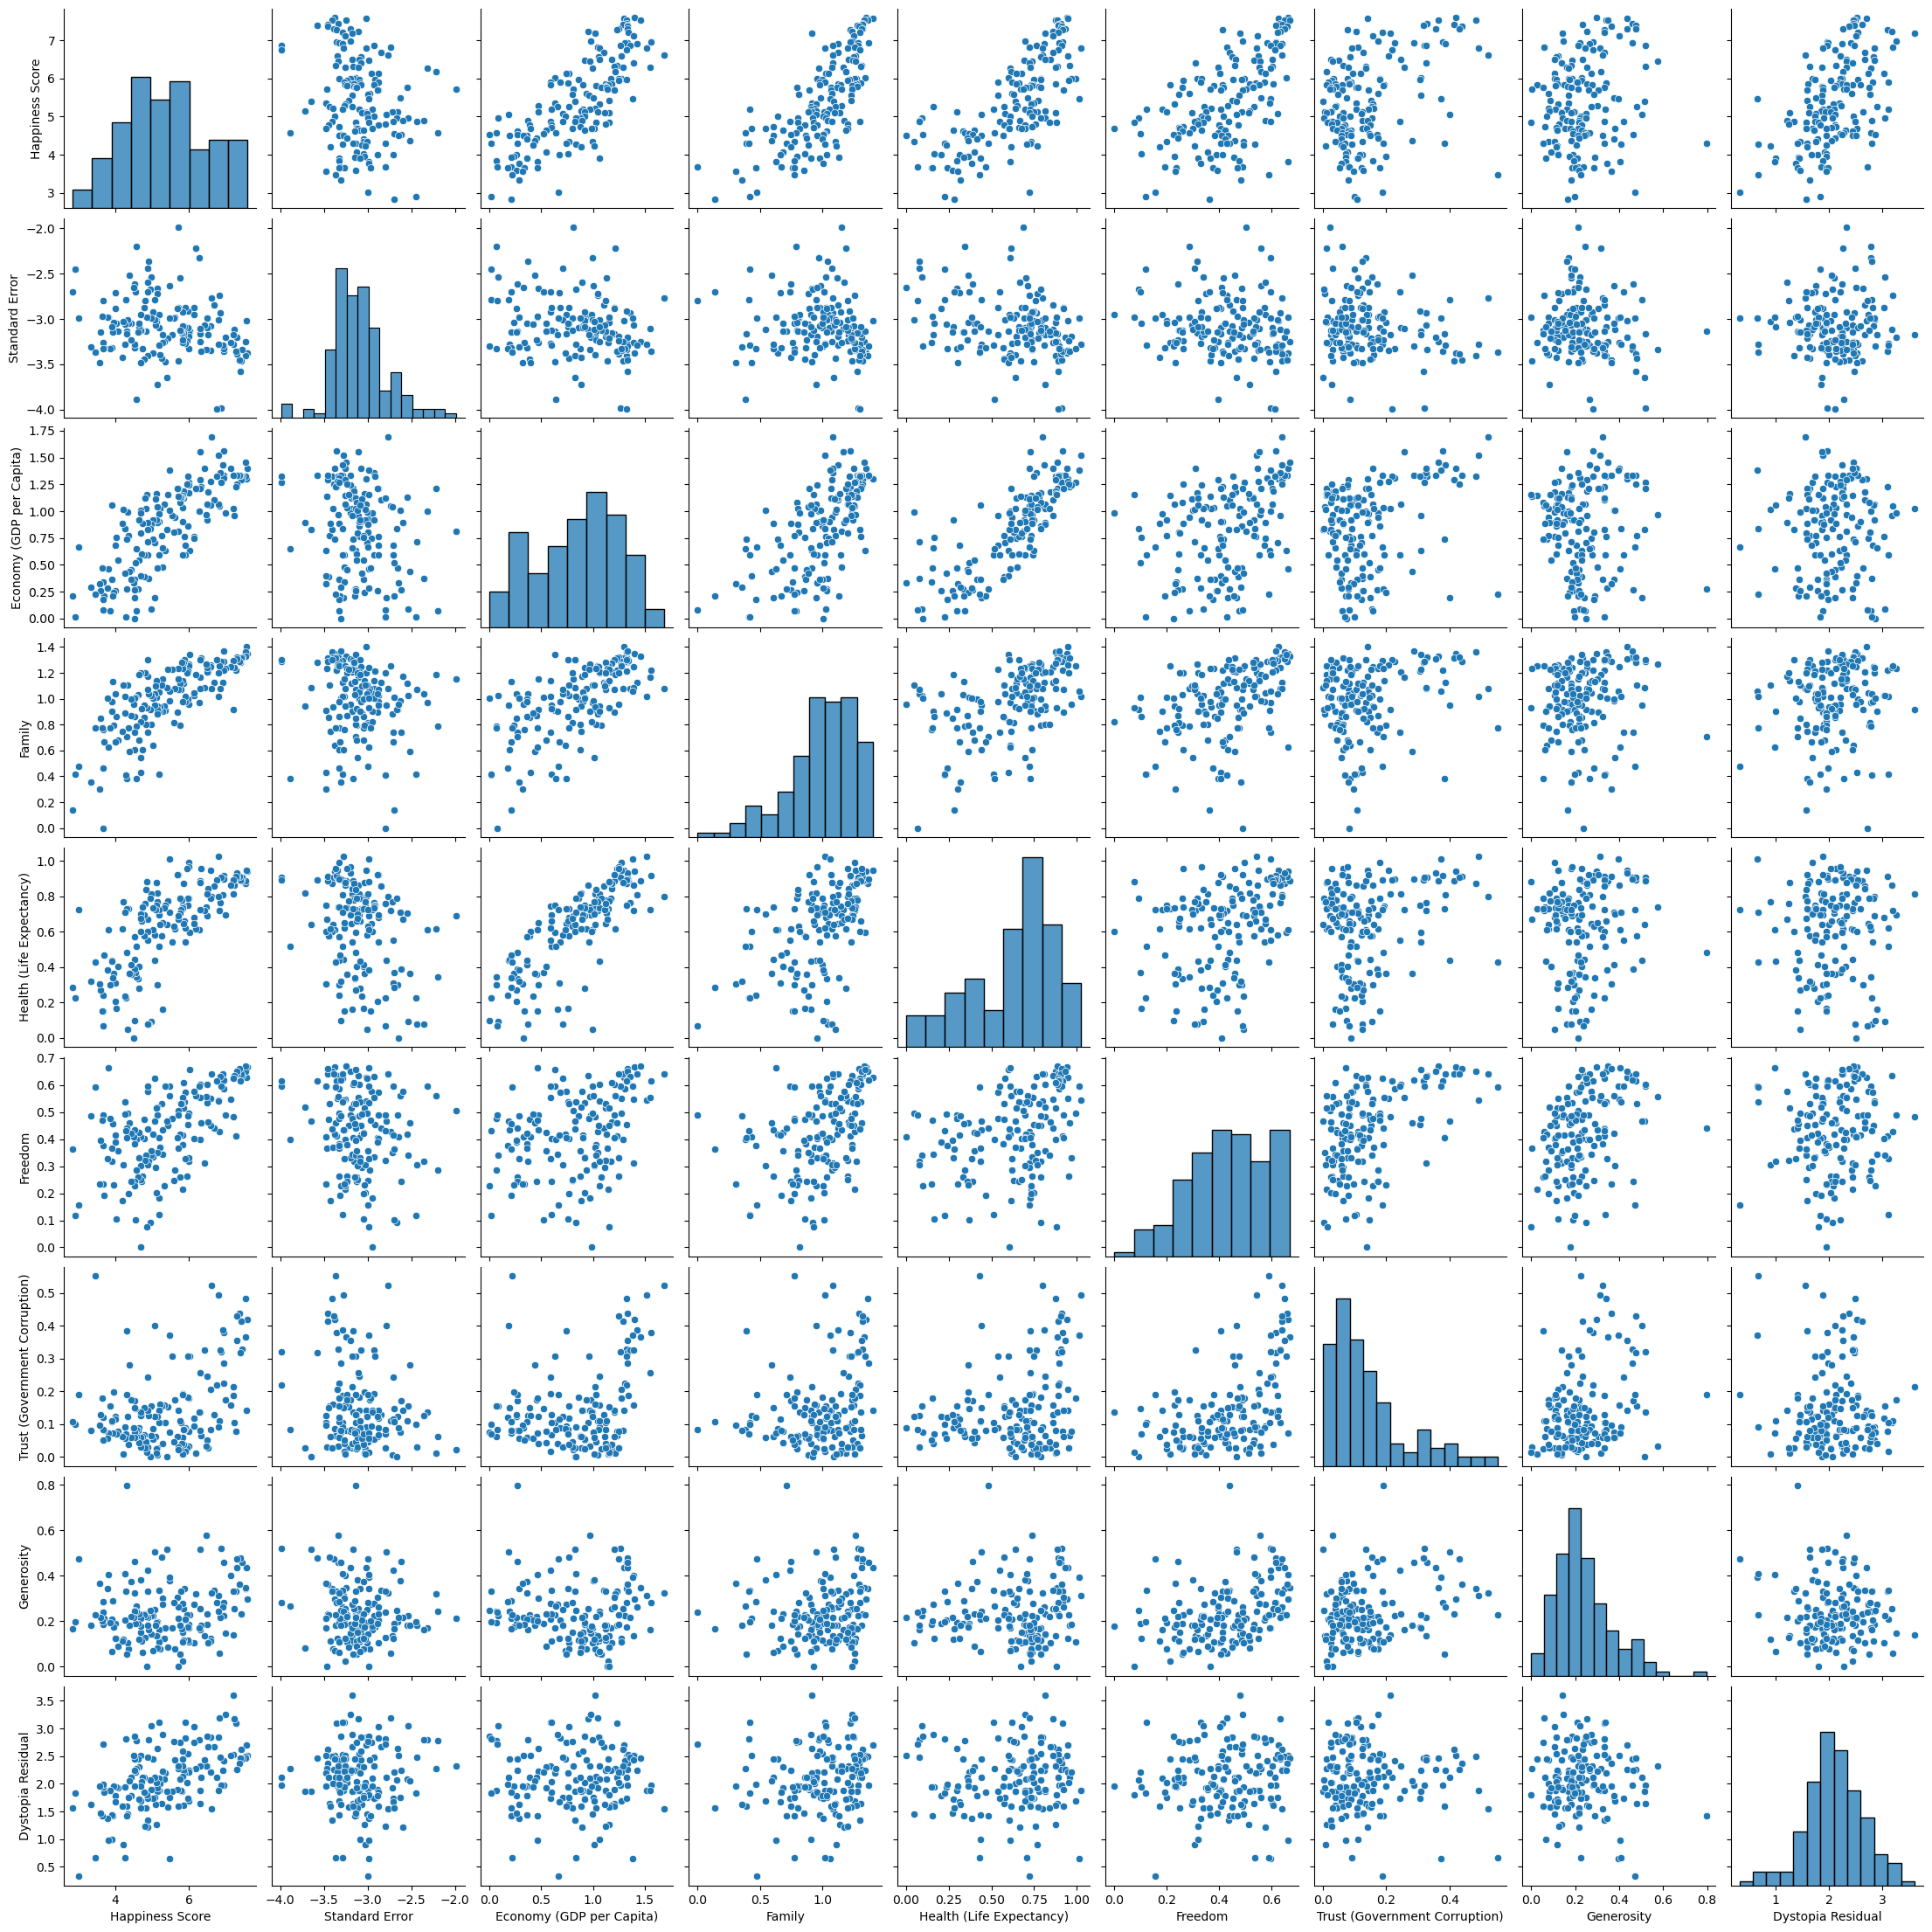

In [23]:
sns.pairplot(new,palette='viridis')

# outlier detection and handling 

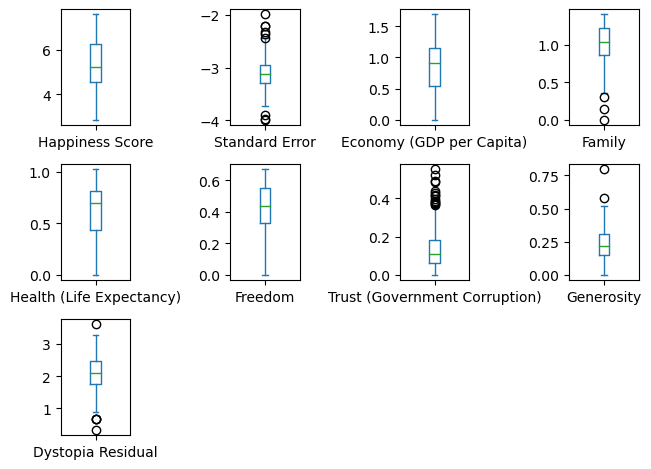

In [24]:
new.plot(kind ='box',subplots=True,layout=(3,4))
plt.tight_layout()

In [25]:
from scipy import stats
# Drop non-numeric columns
numeric_cols = new.select_dtypes(include=[np.number]).columns
df_numeric = new[numeric_cols]

# Compute z-scores for the numeric columns
zscore = np.abs(stats.zscore(df_numeric))
threshold = 3
print(np.where(zscore > threshold))

(array([ 27,  64, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 7, 3, 6, 8, 3], dtype=int64))


In [26]:
df_numeric = df_numeric.loc[(zscore < 3).all(axis=1)]

<Figure size 1600x1400 with 0 Axes>

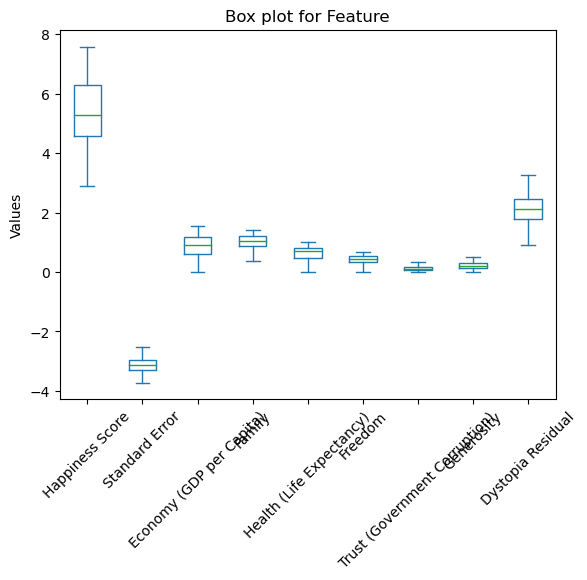

In [27]:
plt.figure(figsize=(16,14))
df_numeric.plot(kind='box', showfliers=False)  # Set showfliers=False to exclude outliers
plt.title('Box plot for Feature')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.grid(False)
plt.show()

In [28]:
new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Train test split

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (126, 8)
Training target vector size: (126,)
Test feature matrix size: (32, 8)
Test target vector size: (32,)


# DecisionTreeRegressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['friedman_mse', 'mse', 'mae'],  # Add valid criterion options here
    'max_depth': [3, 5, 5, None],
    'splitter': ['best', 'random']
}

# Create a decision tree regressor object
tree_regressor = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=50)

# Assuming X_train and Y_train are your training data
# Fit the GridSearchCV object
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator to predict on test data
Y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

#print('Socre: ',grid_search.score(X_train,Y_train))
print('MSE  :',mean_squared_error(Y_test,Y_pred))
print('RMSE :',np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('R2   :',r2_score(Y_pred,Y_test))

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'splitter': 'best'}
MSE  : 0.35430505158017356
RMSE : 0.5952352909397876
R2   : 0.7171673958173819


# RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=0) # n_estimators = 100 which is the number of trees.
rf_reg.fit(X_train, Y_train)
pred_rf = rf_reg.predict(X_test)

print('Score:', rf_reg.score(X_train, Y_train))
print('RMSE :', np.sqrt(mean_squared_error(Y_test, pred_rf)))
print('R2   :', r2_score(Y_test, pred_rf))

Score: 0.9836376636425053
RMSE : 0.3821552856169853
R2   : 0.895828118293688


# xgboost for Regressor

In [33]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
random_seed = 0  # due to this Model performance is stable 

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
random_seed = 0  # Due to this, model performance is stable 

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse',  # root mean squared error
    'max_depth': 3,
    'learning_rate': 0.04,
    'random_state': random_seed,
    'n_estimators': 100,
    'min_child_weight': 1,
}

# Train the XGBoost model
model1 = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
pred_xgb = model1.predict(dtest)

# Make predictions on the training set
pred_train = model1.predict(dtrain)

# Compute training score manually
train_score = r2_score(Y_train, pred_train)

# Evaluate the model
print('Score:', train_score)  # Printing training score
print('RMSE:', np.sqrt(mean_squared_error(Y_test, pred_xgb)))
print('R2:', r2_score(Y_test, pred_xgb))


Score: 0.9899602475135205
RMSE: 0.33434612003266795
R2: 0.9160241926368803


In [38]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# Now you can use the model to make predictions
def pred(test_value, model):
    test_value_reshaped = test_value.reshape(1, -1)
    prediction = model.predict(test_value_reshaped)
    return prediction

#test_value = np.array([2.9,  -2.44,0.41,0.22,0.11,0.10,0.19,1.83])
test_value = np.array([7.5, -3.4, 1.32, 1.36, 0.87, 0.64, 0.48, 2.49])
predictions = pred(test_value, rf_reg)
print(predictions)

[6.31184]


In [39]:
import joblib
joblib.dump(rf_reg,'World_happyness_Prediction')

['World_happyness_Prediction']